

> 2702305576 - Grace Esther D. S.



# **Dataset B: Hotel Booking Data**

This dataset contains information about hotel bookings, including details about the guests, their stay, and their booking status.

### Features:

- **Booking_ID**: A unique identifier for each booking.
- **no_of_adults**: The number of adults in the booking.
- **no_of_children**: The number of children in the booking.
- **no_of_weekend_nights**: The number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.
- **no_of_week_nights**: The number of weekdays (Monday to Friday) the guest stayed or booked to stay at the hotel.
- **type_of_meal_plan**: The type of meal plan chosen by the guest.
- **required_car_parking_space**: Indicates whether the guest requires a car parking space (0 - No, 1 - Yes).
- **room_type_reserved**: The type of room reserved by the guest. The values are encoded by INN Hotels.
- **lead_time**: The number of days between the booking date and the arrival date.
- **arrival_year**: The year of the guest's arrival date.
- **arrival_month**: The month of the guest's arrival date.
- **arrival_date**: The specific arrival date of the guest.
- **market_segment_type**: The market segment to which the booking belongs.
- **repeated_guest**: Indicates whether the guest is a repeat customer (0 - No, 1 - Yes).
- **no_of_previous_cancellations**: The number of previous bookings that were canceled by the guest before the current booking.
- **no_of_previous_bookings_not_canceled**: The number of previous bookings that were not canceled by the guest before the current booking.
- **avg_price_per_room**: The average price per room per day for the booking; the price is dynamic (in euros).
- **no_of_special_requests**: The total number of special requests made by the guest (e.g., high floor, room view, etc.).
- **booking_status (target variable)**: A flag indicating whether the booking was canceled or not.

### Target Variable:

- **booking_status**: The target variable, which indicates whether the booking was canceled (`1`) or not (`0`).

---

Import necessary libraries

In [175]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

Load dataset and observe its head

In [176]:
df = pd.read_csv('Dataset_B_hotel.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0.0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0.0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0.0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0.0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0.0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


Describe the dataframe too see each observation value range

In [177]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,35005.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,34643.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.031281,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.447208,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.174079,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.158417,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.275000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


Check the dataframe info to see its data type, shape, cols, even missing values

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     35368 non-null  object 
 6   required_car_parking_space            35005 non-null  float64
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

Check booking status as y variable, to determine whether it's a binary or else

In [179]:
df['booking_status'].value_counts()

,count
booking_status,
Not_Canceled,24390
Canceled,11885


# **Split & Preprocessing**

Define X & y. In this case, I'm using booking status as y (output) and remove it from input

In [180]:
input_df = df.drop(columns=['booking_status'])
output_df = df['booking_status']

Split the df into train & testm with test size 20%

In [181]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

Check both X & y top rows, shape to comprehend the objective better

In [182]:
x_train.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
25629,INN25630,2,1,2,1,Meal Plan 1,0.0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0
14473,INN14474,2,1,1,1,Meal Plan 1,0.0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2
23720,INN23721,2,0,0,3,Meal Plan 1,0.0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0
5843,INN05844,2,0,2,5,Meal Plan 1,0.0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0
18709,INN18710,1,0,0,2,Meal Plan 1,0.0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0


In [183]:
y_train.head()

,booking_status
25629,Not_Canceled
14473,Not_Canceled
23720,Canceled
5843,Not_Canceled
18709,Canceled


In [184]:
x_train.shape

(29020, 18)

Categorizes columns in x_train into categorical (string), numerical non-binary (numeric with >2 unique values), also numerical binary (numeric with 2 unique values). Prints the resulting lists. This way helps me much for future analysis

In [185]:
categorical = []
numerical_nonbinary = []
numerical_binary = []

for col in x_train.columns:
    if x_train[col].dtype == "object":
        categorical.append(col)
    else:
        unique_vals = x_train[col].dropna().unique()
        if len(unique_vals) == 2:
            numerical_binary.append(col)
        elif len(unique_vals) > 2:
            numerical_nonbinary.append(col)

print("Categorical columns:")
print(categorical)

print("\nNumerical (non-binary) columns:")
print(numerical_nonbinary)

print("\nNumerical (binary) columns:")
print(numerical_binary)

Categorical columns:
['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

Numerical (non-binary) columns:
['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

Numerical (binary) columns:
['required_car_parking_space', 'arrival_year', 'repeated_guest']


Check both variables' missing value, to prevent bad model

In [186]:
x_train.isna().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,736
required_car_parking_space,1039
room_type_reserved,0
lead_time,0
arrival_year,0


Using boxplot for anomalies/outliers detection. I parted into two frame (one smaller freq & one higher freq) so I could observe better

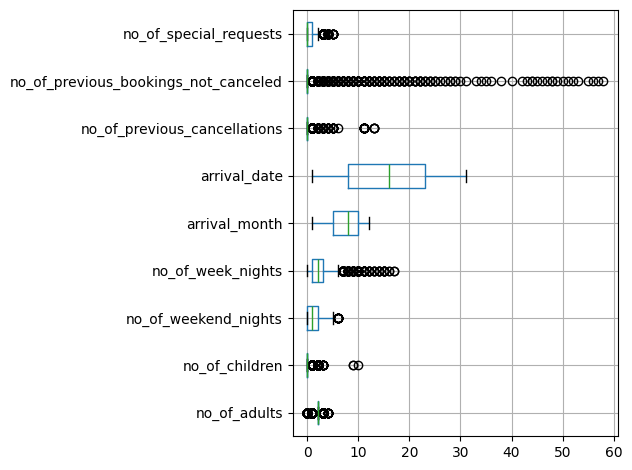

In [187]:
boxplot = x_train.boxplot(column=[
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
    'arrival_month', 'arrival_date', 'no_of_previous_cancellations',
    'no_of_previous_bookings_not_canceled', 'no_of_special_requests'
], vert=False)

plt.tight_layout()
plt.show()

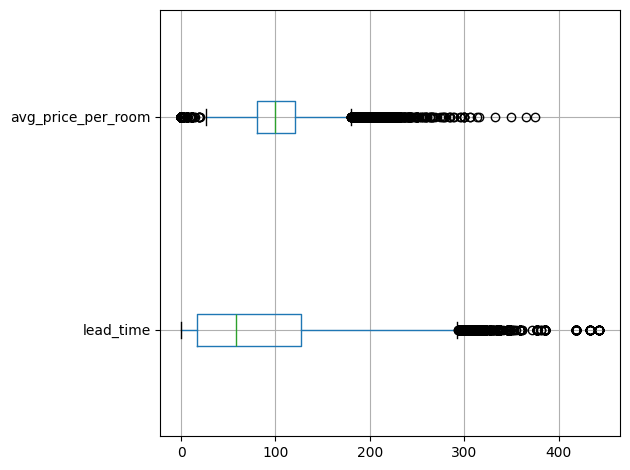

In [188]:
boxplot = x_train.boxplot(column=['lead_time','avg_price_per_room'], vert=False)

plt.tight_layout()
plt.show()

Turns out there are three observations with missing values. Therefore do value_counts() for each to determine best imputation technique

In [189]:
x_train['type_of_meal_plan'].value_counts()

,count
type_of_meal_plan,
Meal Plan 1,21726
Not Selected,3963
Meal Plan 2,2591
Meal Plan 3,4


I assume those who didn't pick 'type_of_meal_plan' are those who don't need a meal plan

In [190]:
x_train['type_of_meal_plan'] = x_train['type_of_meal_plan'].fillna('Not Selected')
x_test['type_of_meal_plan'] = x_test['type_of_meal_plan'].fillna('Not Selected')

In [191]:
x_train['required_car_parking_space'].value_counts()

,count
required_car_parking_space,
0.0,27081
1.0,900


Pick the majority (0)

In [192]:
x_train['required_car_parking_space'] = x_train['required_car_parking_space'].fillna(0.0)
x_test['required_car_parking_space'] = x_test['required_car_parking_space'].fillna(0.0)

As we can see on the boxplot, 'avg_price_per_room' has tons of outliers. Hence, impute it with median

In [193]:
median_price = x_train['avg_price_per_room'].median()
x_train['avg_price_per_room'] = x_train['avg_price_per_room'].fillna(median_price)
x_test['avg_price_per_room'] = x_test['avg_price_per_room'].fillna(median_price)

Quick check for the categoricals

In [194]:
for col in categorical:
    print(f"\nValue counts for '{col}':")
    print(x_train[col].value_counts(dropna=False))


Value counts for 'Booking_ID':
Booking_ID
INN15796    1
INN25630    1
INN14474    1
INN23721    1
INN05844    1
           ..
INN07135    1
INN21650    1
INN21524    1
INN19753    1
INN06713    1
Name: count, Length: 29020, dtype: int64

Value counts for 'type_of_meal_plan':
type_of_meal_plan
Meal Plan 1     21726
Not Selected     4699
Meal Plan 2      2591
Meal Plan 3         4
Name: count, dtype: int64

Value counts for 'room_type_reserved':
room_type_reserved
Room_Type 1    22489
Room_Type 4     4841
Room_Type 6      773
Room_Type 2      567
Room_Type 5      214
Room_Type 7      131
Room_Type 3        5
Name: count, dtype: int64

Value counts for 'market_segment_type':
market_segment_type
Online           18550
Offline           8430
Corporate         1632
Complementary      312
Aviation            96
Name: count, dtype: int64


Ensure everything's ready to go (no missing value)

I don't do anything for the outliers, since each case for each observation still make sense

In [195]:
x_train.isna().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [196]:
x_test.isna().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


As we observed previously, these three observations possess categories

In [197]:
from sklearn.preprocessing import OneHotEncoder

meal_enc_train = x_train[['type_of_meal_plan']]
room_enc_train = x_train[['room_type_reserved']]
market_enc_train = x_train[['market_segment_type']]

meal_enc_test = x_test[['type_of_meal_plan']]
room_enc_test = x_test[['room_type_reserved']]
market_enc_test = x_test[['market_segment_type']]

meal_encoder = OneHotEncoder()
room_encoder = OneHotEncoder()
market_encoder = OneHotEncoder()

meal_encoded_train = pd.DataFrame(meal_encoder.fit_transform(meal_enc_train).toarray(),
                                   columns=meal_encoder.get_feature_names_out())
room_encoded_train = pd.DataFrame(room_encoder.fit_transform(room_enc_train).toarray(),
                                   columns=room_encoder.get_feature_names_out())
market_encoded_train = pd.DataFrame(market_encoder.fit_transform(market_enc_train).toarray(),
                                   columns=market_encoder.get_feature_names_out())

meal_encoded_test = pd.DataFrame(meal_encoder.transform(meal_enc_test).toarray(),
                                  columns=meal_encoder.get_feature_names_out())
room_encoded_test = pd.DataFrame(room_encoder.transform(room_enc_test).toarray(),
                                  columns=room_encoder.get_feature_names_out())
market_encoded_test = pd.DataFrame(market_encoder.transform(market_enc_test).toarray(),
                                  columns=market_encoder.get_feature_names_out())

x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)

x_train_enc = pd.concat([x_train, meal_encoded_train, room_encoded_train, market_encoded_train], axis=1)
x_test_enc = pd.concat([x_test, meal_encoded_test, room_encoded_test, market_encoded_test], axis=1)


Get the feature names (ensuring)

In [198]:
meal_encoder_feature_names = meal_encoder.get_feature_names_out()
room_encoder_feature_names = room_encoder.get_feature_names_out()
market_encoder_feature_names = market_encoder.get_feature_names_out()

In [199]:
print("Meal Encoder Feature Names:")
print(meal_encoder_feature_names)

print("\nRoom Encoder Feature Names:")
print(room_encoder_feature_names)

print("\nMarket Encoder Feature Names:")
print(market_encoder_feature_names)

Meal Encoder Feature Names:
['type_of_meal_plan_Meal Plan 1' 'type_of_meal_plan_Meal Plan 2'
 'type_of_meal_plan_Meal Plan 3' 'type_of_meal_plan_Not Selected']

Room Encoder Feature Names:
['room_type_reserved_Room_Type 1' 'room_type_reserved_Room_Type 2'
 'room_type_reserved_Room_Type 3' 'room_type_reserved_Room_Type 4'
 'room_type_reserved_Room_Type 5' 'room_type_reserved_Room_Type 6'
 'room_type_reserved_Room_Type 7']

Market Encoder Feature Names:
['market_segment_type_Aviation' 'market_segment_type_Complementary'
 'market_segment_type_Corporate' 'market_segment_type_Offline'
 'market_segment_type_Online']


Save the encoders after fitting them

In [200]:
import pickle as pkl

filename_meal = 'oneHot_encode_meal.pkl'
pkl.dump(meal_encoder, open(filename_meal, 'wb'))

filename_room = 'oneHot_encode_room.pkl'
pkl.dump(room_encoder, open(filename_room, 'wb'))

filename_market = 'oneHot_encode_market.pkl'
pkl.dump(market_encoder, open(filename_market, 'wb'))

In [201]:
x_train_enc.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,INN25630,2,1,2,1,Meal Plan 1,0.0,Room_Type 1,26,2017,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,INN14474,2,1,1,1,Meal Plan 1,0.0,Room_Type 1,98,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,INN23721,2,0,0,3,Meal Plan 1,0.0,Room_Type 1,433,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,INN05844,2,0,2,5,Meal Plan 1,0.0,Room_Type 1,195,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,INN18710,1,0,0,2,Meal Plan 1,0.0,Room_Type 1,188,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [202]:
x_test_enc.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_s

Drop those who aren't that needed & encoded

In [203]:
x_train_enc=x_train_enc.drop(['Booking_ID','type_of_meal_plan', 'room_type_reserved', 'market_segment_type'],axis=1)

In [204]:
x_train_enc.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,1,2,1,0.0,26,2017,10,17,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,1,1,1,0.0,98,2018,7,16,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,0,0,3,0.0,433,2018,9,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,0,2,5,0.0,195,2018,8,8,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,0,2,0.0,188,2018,6,15,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [205]:
x_train_enc.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests',
       'type_of_meal_plan_Meal Plan 1', 'type_of_meal_plan_Meal Plan 2',
       'type_of_meal_plan_Meal Plan 3', 'type_of_meal_plan_Not Selected',
       'room_type_reserved_Room_Type 1', 'room_type_reserved_Room_Type 2',
       'room_type_reserved_Room_Type 3', 'room_type_reserved_Room_Type 4',
       'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6',
       'room_type_reserved_Room_Type 7', 'market_segment_type_Aviation',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online'],
      dtype='object')

In [206]:
x_test_enc=x_test_enc.drop(['Booking_ID','type_of_meal_plan', 'room_type_reserved', 'market_segment_type'],axis=1)

# **Training: RandomForest & XGBoost**

## RandomForest

In [207]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train_enc, y_train)

RandomForestClassifier(max_depth=4)

After fitted, do predict

In [208]:
y_predict=RF_class.predict(x_test_enc)

Classification report to check the performance evaluation metric/summarizes the precision, recall, F1-score, and support for each class in a classification problem. To determine whether the model is good to go or not

In [209]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['1','0']))


Classification Report

              precision    recall  f1-score   support

           1       0.96      0.36      0.53      2416
           0       0.76      0.99      0.86      4839

    accuracy                           0.78      7255
   macro avg       0.86      0.68      0.69      7255
weighted avg       0.82      0.78      0.75      7255



In [210]:
# filename = 'RF_booking_status.pkl'
# pkl.dump(RF_class, open(filename, 'wb'))

## XGBoost

XGBoost

Since XGBoost prefers number, therefore we replace with 0/1

In [211]:
y_train_enc = y_train.replace({'Canceled': 1, 'Not_Canceled': 0})
y_test_enc = y_test.replace({'Canceled': 1, 'Not_Canceled': 0})

In [212]:
y_encode = {'Canceled': 1, 'Not_Canceled': 0}
filename = 'y_encode.pkl'
pkl.dump(y_encode, open(filename, 'wb'))

In [213]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

scale_weight = 24390 / 11885

XGB_class = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    max_depth=4,
    scale_pos_weight=scale_weight
)

XGB_class.fit(x_train_enc, y_train_enc)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [214]:
y_predict = XGB_class.predict(x_test_enc)

In [215]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test_enc, y_predict, target_names=['Not_Canceled', 'Canceled']))


Classification Report

              precision    recall  f1-score   support

Not_Canceled       0.92      0.88      0.90      4839
    Canceled       0.78      0.84      0.81      2416

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.86      7255
weighted avg       0.87      0.87      0.87      7255



Save the pickel model

In [216]:
filename = 'XGB_booking_status.pkl'
pkl.dump(XGB_class, open(filename, 'wb'))

In [217]:
# XGB_class.save_model("XGB_booking_status.json")

# **Model Performance Report: RandomForest vs XGBoost**

Here we predicting booking cancellations (`Canceled` vs `Not_Canceled`).

## 1. **Random Forest**

### Model Configuration:
- **Model Type**: Random Forest Classifier
- **Hyperparameters**: Max Depth = 4, Gini Index Criterion

### Classification Report:

| Metric           | Precision | Recall  | F1-Score | Support |
|------------------|-----------|---------|----------|---------|
| **1** (Canceled) | 0.96      | 0.36    | 0.53     | 2416    |
| **0** (Not Canceled) | 0.76      | 0.99    | 0.86     | 4839    |
| **Accuracy**     |           |         | **0.78** | 7255    |
| **Macro avg**    | 0.86      | 0.68    | 0.69     | 7255    |
| **Weighted avg** | 0.82      | 0.78    | 0.75     | 7255    |

### Observations:
- **Precision** for the `Canceled` class is very high (0.96), but **Recall** is low (0.36), indicating that the model is more effective at identifying `Not_Canceled` bookings.
- The **Accuracy** of 0.78 suggests that the model might be biased towards predicting `Not_Canceled` due to class imbalance.

---

## 2. **XGBoost**

### Model Configuration:
- **Model Type**: XGBoost Classifier
- **Hyperparameters**: Max Depth = 4, Log Loss Evaluation Metric

### Classification Report:

| Metric           | Precision | Recall  | F1-Score | Support |
|------------------|-----------|---------|----------|---------|
| **Not_Canceled** | 0.92      | 0.88    | 0.90     | 4839    |
| **Canceled**     | 0.78      | 0.84    | 0.81     | 2416    |
| **Accuracy**     |           |         | **0.87** | 7255    |
| **Macro avg**    | 0.85      | 0.86    | 0.86     | 7255    |
| **Weighted avg** | 0.87      | 0.87    | 0.87     | 7255    |

### Observations:
- **Precision** and **Recall** for the `Not_Canceled` class are strong (0.88 and 0.92, respectively), indicating the model is very effective at identifying non-canceled bookings.
- The **Recall** for the `Canceled` class (0.84) is good, showing that the model is also capable of detecting cancellations.
- Overall, **XGBoost** outperforms **Random Forest** with an **accuracy** of 0.87, **macro average** of 0.86, and **weighted average** of 0.87.

---

## Conclusion:

- **XGBoost** performs better than **Random Forest** in terms of **accuracy** and **classification metrics**, particularly in terms of **recall** for the `Canceled` class.
- The **Random Forest** model shows high precision but struggles with recall.


